In [1]:
import pandas as pd
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
x = pd.DataFrame([[1988,2061,2335,2750,3356,3806],[386,408,422,482,511,561], [839,846,960,1258,1577,1893], [763,808,953,1010,1268,1352]])
x.columns = ['2000','2001','2002','2003','2004','2005']
x.index = ['国内生产总值','第一产业','第二产业','第三产业']
dd = x.T
dd

,国内生产总值,第一产业,第二产业,第三产业
2000,1988,386,839,763
2001,2061,408,846,808
2002,2335,422,960,953
2003,2750,482,1258,1010
2004,3356,511,1577,1268
2005,3806,561,1893,1352


<AxesSubplot:>

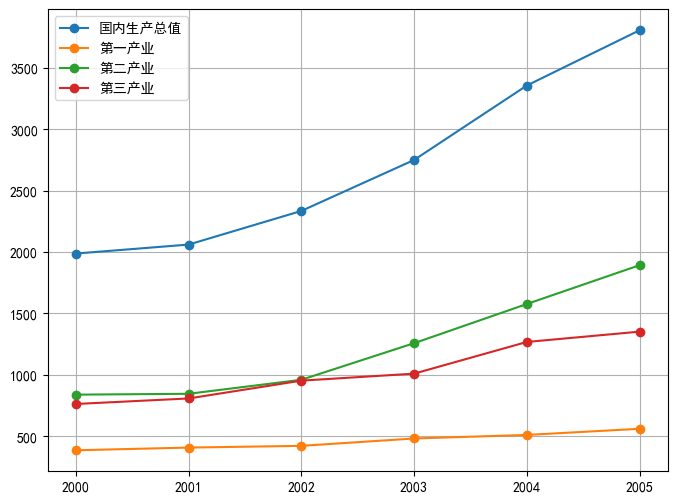

In [42]:
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False  
dd.plot(kind='line',figsize=(8,6),grid=True,marker='o')

In [47]:
# 方法一
# 无量纲化
def dimensionlessProcessing(df):
    newDataFrame = pd.DataFrame(index=df.index)
    columns = df.columns.tolist()
    for c in columns:
        d = df[c]
        MAX = d.max()
        MIN = d.min()
        MEAN = d.mean()
        newDataFrame[c] = ((d - MEAN) / (MAX - MIN)).tolist()
    return newDataFrame

# dd为输入数据表，m为参数列，默认为0，如果flag为非None，则可任意值，无意义
# flag 标识参考列方式，默认None是按列取值
# flag = 'MAX' 按最大值取值
# flag = 'MIN' 按最小值取值

def GRA(dd, m=0, flag=None):
    # 读取为df格式
    #dd = dimensionlessProcessing(dd)
    
    x_mean=dd.mean(axis=0)
    #print(x_mean)
    for i in range(len(dd.columns)):
        dd.iloc[:,i] = dd.iloc[:,i]/x_mean[i]    

    # 参考要素
    if flag==None:
        std = dd.iloc[:, m]  # 为参考要素
        dd.drop(dd.columns[m],axis=1,inplace=True)
    elif flag=='MAX':
        std = dd.max(axis=1)
    elif flag=='MIN':
        std = dd.min(axis=1)
    else:
        print('flag eorro!')
        return None
        
    print(std)
    
    print(dd)
    shape_n, shape_m = dd.shape[0], dd.shape[1]  # 计算行列

    # 与参考要素比较，相减
    a = zeros([shape_m, shape_n])
    
    for i in range(shape_m):
        for j in range(shape_n):
            a[i, j] = abs(dd.iloc[j, i] - std[j])

    # 取出矩阵中最大值与最小值
    print(a)
    c, d = a.max().max(), a.min().min()
    print(c,d)

    # 计算关联系数
    result = (d + 0.5 * c) / (a + 0.5 * c)

    # 求均值，得到灰色关联度,并返回
    result_list = [mean(result[i, :]) for i in range(shape_m)]
    
    return pd.DataFrame(result_list)



In [49]:
df = x.iloc[:,:].T.copy()

print(df)

data_gra = GRA(df, flag='MAX')
#data_gra = GRA(df, m=0) #,flag='MAX')

data_gra

      国内生产总值  第一产业  第二产业  第三产业
2000    1988   386   839   763
2001    2061   408   846   808
2002    2335   422   960   953
2003    2750   482  1258  1010
2004    3356   511  1577  1268
2005    3806   561  1893  1352
2000    0.836101
2001    0.883755
2002    0.929152
2003    1.044043
2004    1.283331
2005    1.540486
dtype: float64
        国内生产总值      第一产业      第二产业      第三产业
2000  0.731959  0.836101  0.682761  0.743906
2001  0.758837  0.883755  0.688458  0.787780
2002  0.859720  0.914079  0.781229  0.929152
2003  1.012518  1.044043  1.023735  0.984725
2004  1.235641  1.106859  1.283331  1.236269
2005  1.401325  1.215162  1.540486  1.318167
[[0.10414232 0.12491799 0.06943159 0.03152491 0.04769042 0.13916008]
 [0.         0.         0.01507235 0.         0.17647187 0.3253231 ]
 [0.15333966 0.19529663 0.14792296 0.02030807 0.         0.        ]
 [0.09219468 0.09597421 0.         0.05931794 0.04706198 0.22231851]]
0.3253231005312094 0.0


,0
0,0.671001
1,0.788028
2,0.730317
3,0.699678


In [50]:
df = x.iloc[:,:].copy()

print(df)

data_gra = GRA(df, flag='MAX')
#data_gra = GRA(df, m=0) #,flag='MAX')

data_gra

        2000  2001  2002  2003  2004  2005
国内生产总值  1988  2061  2335  2750  3356  3806
第一产业     386   408   422   482   511   561
第二产业     839   846   960  1258  1577  1893
第三产业     763   808   953  1010  1268  1352
国内生产总值    2.000000
第一产业      0.395828
第二产业      0.994745
第三产业      0.816274
dtype: float64
            2000      2001      2002      2003      2004      2005
国内生产总值  2.000000  1.999515  2.000000  2.000000  2.000000  2.000000
第一产业    0.388330  0.395828  0.361456  0.350545  0.304529  0.294798
第二产业    0.844064  0.820762  0.822270  0.914909  0.939809  0.994745
第三产业    0.767606  0.783895  0.816274  0.734545  0.755662  0.710457
[[0.         0.0074983  0.15068075 0.04866846]
 [0.00048508 0.         0.17398356 0.03237887]
 [0.         0.03437218 0.17247533 0.        ]
 [0.         0.04528283 0.07983605 0.08172864]
 [0.         0.09129908 0.05493584 0.06061259]
 [0.         0.10103059 0.         0.10581692]]
0.17398355788102304 0.0


,0
0,0.731977
1,0.764135
2,0.763014
3,0.673676
4,0.672552
5,0.728462


In [10]:
x = [[2045.3,1942.2,1637.2,1884.2,1602.3],
     [34374,31793,27319,32516,167297],
     [14.6792,14.8449,1.4774,46.604,9.4959],
     [120.9,100.1,65.9,80.52,54.22],
     [0.3069,0.7409,0.361,3.7,2.0213],
     [49.4201,34.8699,50.974,50.4325,40.8828]]
x = pd.DataFrame(x)
x

,0,1,2,3,4
0,2045.3000,1942.2000,1637.2000,1884.2000,1602.3000
1,34374.0000,31793.0000,27319.0000,32516.0000,167297.0000
2,14.6792,14.8449,1.4774,46.6040,9.4959
3,120.9000,100.1000,65.9000,80.5200,54.2200
4,0.3069,0.7409,0.3610,3.7000,2.0213
5,49.4201,34.8699,50.9740,50.4325,40.8828


In [14]:
# 方法二
import pandas as pd

# 1、数据均值化处理
x_mean=x.mean(axis=1)
print(x_mean)
for i in range(x.index.size):
    x.iloc[i,:] = x.iloc[i,:]/x_mean[i]
    #x.iloc[i,:] = x.iloc[i,:]/x.iloc[i,0]
print(x)
# 2、提取参考队列和比较队列
ck=x.iloc[0,:]
cp=x.iloc[1:,:]
# print(cp)
# 比较队列与参考队列相减
t=pd.DataFrame()
for j in range(cp.index.size):
    temp=pd.Series(cp.iloc[j,:]-ck)
    temp = temp.abs()
    t=t.append(temp,ignore_index=True)

print(t)
#求最大差和最小差
#mmax=t.abs().max().max()
#mmin=t.abs().min().min()
mmax=t.max().max()
mmin=t.min().min()
print('mmax',mmax)
print('mmin',mmin)
rho=0.5
#3、求关联系数
ksi=((mmin+rho*mmax)/(abs(t)+rho*mmax))
print(ksi)


#4、求关联度
r=ksi.sum(axis=1)/ksi.columns.size

#5、关联度排序，得到结果r3>r2>r1
result=r.sort_values(ascending=False)
print('result')
print(result)

0    2716.000000
1     461.666667
2    1228.833333
3    1025.666667
dtype: float64
          0         1         2         3         4         5
0  0.731959  0.758837  0.859720  1.012518  1.235641  1.401325
1  0.836101  0.883755  0.914079  1.044043  1.106859  1.215162
2  0.682761  0.688458  0.781229  1.023735  1.283331  1.540486
3  0.743906  0.787780  0.929152  0.984725  1.236269  1.318167
          0         1         2         3         4         5
0  0.104142  0.124918  0.054359  0.031525  0.128781  0.186163
1  0.049197  0.070379  0.078491  0.011217  0.047690  0.139160
2  0.011948  0.028944  0.069432  0.027793  0.000628  0.083158
mmax 0.18616302377142002
mmin 0.0006284452608860125
          0         1         2         3         4         5
0  0.475145  0.429863  0.635577  0.752048  0.422378  0.335584
1  0.658636  0.573289  0.546182  0.898480  0.665686  0.403502
2  0.892228  0.767955  0.576630  0.775266  1.000000  0.531718
result
2    0.757300
1    0.624296
0    0.508432
dtype: flo

C:\Users\xiaoyw\AppData\Local\Temp\ipykernel_16236\2977559456.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t=t.append(temp,ignore_index=True)
C:\Users\xiaoyw\AppData\Local\Temp\ipykernel_16236\2977559456.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t=t.append(temp,ignore_index=True)
